In [0]:
from IPython.display import display, Image

In [4]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=33708b68bfa893d2dc9c35e37cbd6fff49dff9b1bed04474d96243cfa2fa8066
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [5]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge # 릿지회귀
import pandas as pd

In [0]:
boston = load_boston()

In [9]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
df_boston.loc[:,'CRIM':"RM"]

,CRIM,ZN,INDUS,CHAS,NOX,RM
0,0.00632,18.0,2.31,0.0,0.538,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421
2,0.02729,0.0,7.07,0.0,0.469,7.185
3,0.03237,0.0,2.18,0.0,0.458,6.998
4,0.06905,0.0,2.18,0.0,0.458,7.147
5,0.02985,0.0,2.18,0.0,0.458,6.430
6,0.08829,12.5,7.87,0.0,0.524,6.012
7,0.14455,12.5,7.87,0.0,0.524,6.172
8,0.21124,12.5,7.87,0.0,0.524,5.631
9,0.17004,12.5,7.87,0.0,0.524,6.004


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
X = df_boston.loc[:,'CRIM':'LSTAT']
Y = boston.target

In [0]:
model = LinearRegression()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,
                                                    random_state=42)

In [25]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [31]:
print('훈련데이터점수 : {:.2f}'.format(model.score(x_train,y_train)))
print('테스트데이터점수 : {:.2f}'.format(model.score(x_test, y_test)))

훈련데이터점수 : 0.74
테스트데이터점수 : 0.71


In [27]:
model.score(x_test,y_test)

0.7112260057484974

In [32]:
## 정규화
X = df_boston.loc[:, 'CRIM':'LSTAT'] # 입력 데이터
y = boston.target

print("정규화,확장 전 데이터 셋 : ", X.shape, y.shape)
normalize_X = MinMaxScaler().fit_transform(X) # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X) # 데이터 featur
print("정규화, 추가 생성 : ", ex_X.shape, y.shape)


정규화,확장 전 데이터 셋 :  (506, 13) (506,)
정규화, 추가 생성 :  (506, 104) (506,)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(ex_X,Y,
                                                    random_state=42)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print('훈련데이터점수 : {:.2f}'.format(model.score(x_train,y_train)))
print('테스트데이터점수 : {:.2f}'.format(model.score(x_test, y_test)))

훈련데이터점수 : 0.95
테스트데이터점수 : 0.66


In [0]:
### alpha값 up 규제 up
from sklearn.linear_model import Ridge

In [47]:
ridge = Ridge().fit(x_train,y_train)
print(ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [41]:
print('훈련데이터점수 : {:.2f}'.format(ridge.score(x_train,y_train)))
print('테스트데이터점수 : {:.2f}'.format(ridge.score(x_test, y_test)))

훈련데이터점수 : 0.86
테스트데이터점수 : 0.83


In [61]:
ilist=[10,1,0.1,0.01]
for i in ilist :
  ridge = Ridge(alpha=i).fit(x_train,y_train)
  print(ridge)

  print('훈련데이터점수 : {:.2f}'.format(ridge.score(x_train,y_train)))
  print('테스트데이터점수 : {:.2f}'.format(ridge.score(x_test, y_test)))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
훈련데이터점수 : 0.77
테스트데이터점수 : 0.73
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
훈련데이터점수 : 0.87
테스트데이터점수 : 0.81
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련데이터점수 : 0.92
테스트데이터점수 : 0.82
Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련데이터점수 : 0.94
테스트데이터점수 : 0.81


In [62]:
ridge01 = Ridge(alpha=0.1).fit(x_train,y_train)
print(ridge)

print('훈련데이터점수 : {:.2f}'.format(ridge01.score(x_train,y_train)))
print('테스트데이터점수 : {:.2f}'.format(ridge01.score(x_test, y_test)))

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련데이터점수 : 0.92
테스트데이터점수 : 0.82


In [0]:
# 2-1 (1) 완료
# alpha = 10 / 0.77, 0.73
# alpha = 1 / 0.87, 0.81
# alpha = 0.1 / 0.92, 0.82
# alpha = 0.01 / 0.94, 0.81

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Ridge alpha=0.01')

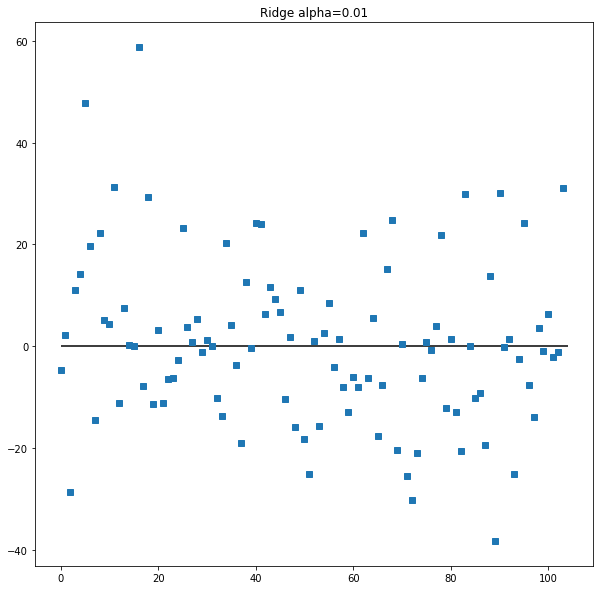

In [63]:
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge.coef_, 's', label='Ridge alpha=0.01')
plt.title('Ridge alpha=0.01')

In [0]:
from sklearn.linear_model import Lasso

In [0]:
ls = Lasso()

In [0]:
ls.fit(x_train, y_train)
pred2 = ls.predict(x_test)

In [68]:
pred2

array([24.00913853, 25.37768099, 21.74547817, 24.98977884, 20.84131873,
       23.27873866, 21.82778418, 20.32336163, 21.84894154, 22.68240572,
       21.97347943, 22.23277931, 16.31373742, 23.26525487, 23.29596141,
       22.22279463, 21.93870568, 17.76346215, 25.55984515, 20.61600189,
       24.72972115, 24.54563922, 20.68673922, 23.77055704, 21.18433638,
       20.62772826, 24.06204533, 20.50331754, 22.03061535, 22.76837311,
       22.7114255 , 24.41682839, 21.68845525, 22.43648882, 19.90668566,
       22.53978515, 25.1955581 , 23.83308642, 22.73612174, 24.53522886,
       21.15516916, 24.27368406, 25.57560217, 23.16303465, 24.09146554,
       20.85572003, 21.65127996, 24.72066876, 21.09780863, 25.05621927,
       23.11016124, 25.16081726, 21.58242074, 24.18576445, 25.51973124,
       22.535608  , 20.96151843, 25.41489314, 23.93535269, 21.75627015,
       23.85458889, 25.09848985, 25.27397927, 23.4433389 , 24.90963371,
       20.67751015, 20.84580105, 24.62958632, 25.23189204, 20.46

In [69]:
ilist=[10,1,0.1,0.01]
for i in ilist :
  ls = Lasso(alpha=i).fit(x_train,y_train)
  print(ls)

  print('훈련데이터점수 : {:.2f}'.format(ls.score(x_train,y_train)))
  print('테스트데이터점수 : {:.2f}'.format(ls.score(x_test, y_test)))

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
훈련데이터점수 : 0.00
테스트데이터점수 : -0.03
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
훈련데이터점수 : 0.27
테스트데이터점수 : 0.26
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
훈련데이터점수 : 0.75
테스트데이터점수 : 0.70
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
훈련데이터점수 : 0.89
테스트데이터점수 : 0.80


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8481333641448145, tolerance: 3.361037625329816
  positive)


In [97]:
ls001 = Lasso(alpha=0.001).fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.3796550249906, tolerance: 3.361037625329816
  positive)


Text(0.5, 1.0, 'Ridge alpha=0.01')

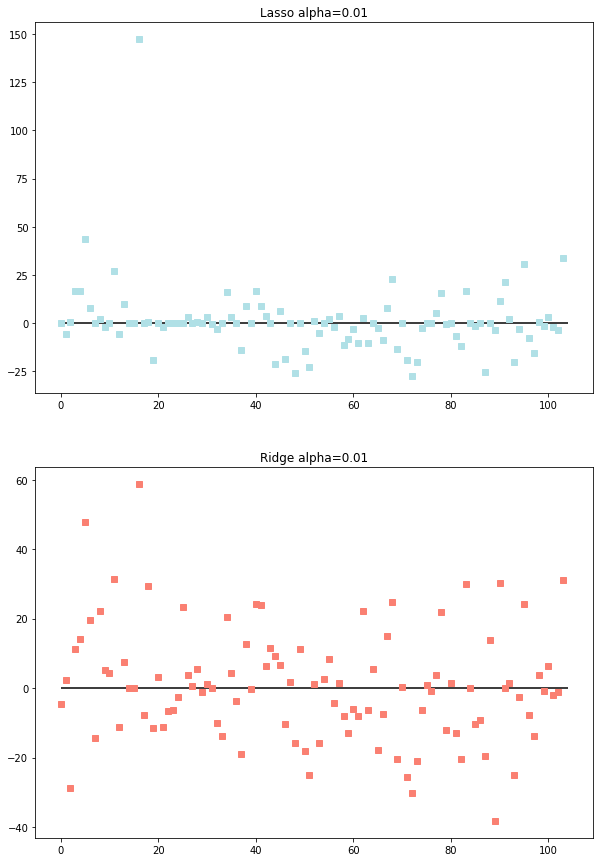

In [98]:

fig = plt.figure(figsize=(10,15))
plt.subplot(211)
plt.hlines(0,0, len(ls001.coef_))
plt.plot(ls001.coef_, 's', label='Lasso alpha=0.01',color='powderblue')
plt.title('Lasso alpha=0.01')

plt.subplot(212)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge.coef_, 's', label='Ridge alpha=0.01',color='salmon')
plt.title('Ridge alpha=0.01')

In [96]:
# 라쏘 최적
ilist = [10,1,0.1,0.01,0.001,0.0001,0.00001]
for i in ilist :
  ls = Lasso(alpha=i).fit(x_train,y_train)
  print(ls)

  print('훈련데이터점수 : {:.2f}'.format(ls.score(x_train,y_train)))
  print('테스트데이터점수 : {:.2f}'.format(ls.score(x_test, y_test)))

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
훈련데이터점수 : 0.00
테스트데이터점수 : -0.03
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
훈련데이터점수 : 0.27
테스트데이터점수 : 0.26
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
훈련데이터점수 : 0.75
테스트데이터점수 : 0.70
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
훈련데이터점수 : 0.89
테스트데이터점수 : 0.80
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False,

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8481333641448145, tolerance: 3.361037625329816
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.3796550249906, tolerance: 3.361037625329816
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471494, tolerance: 3.361037625329816
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1047.246243284